# Day_042

### 練習時間

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與迴歸模型的結果進行比較

#### § 建立模型四步驟
1. 讀進資料，並檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
 * 使用 pandas 讀取 .csv 檔：pd.read_csv
 * 使用 numpy 讀取 .txt 檔：np.loadtxt
 * 使用 Scikit-learn 內建的資料集：sklearn.datasets.load_xxx
 * 檢查資料數量：data.shape (data should be np.array or dataframe)

2. 將資料切為訓練 (train) / 測試 (test)
 * train_test_split(data)

3. 建立模型，將資料 fit 進模型開始訓練
 * clf = DecisionTreeClassifier()
 * clf.fit(x_train, y_train)

4. 將測試資料 (features) 放進訓練好的模型中，得到 prediction，與測試資料的 label (y_test) 做評估
 * clf.predict(x_test)
 * accuracy_score(y_test, y_pred)
 * f1_score(y_test, y_pred)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # 分類問題
from sklearn.model_selection import train_test_split # 迴歸問題

In [2]:
# load_breast_cancer
breast_cancer = datasets.load_breast_cancer()

df_breast_cancer = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
print(df_breast_cancer.shape)
df_breast_cancer.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print(pd.Series(breast_cancer.target).value_counts())
print("")
print(f"Unique values in breast_cancer.target = {np.unique(breast_cancer.target)}")

1    357
0    212
dtype: int64

Unique values in breast_cancer.target = [0 1]


#### DecisionTreeClassifier 內置參數預設
DecisionTreeClassifier(
criterion='gini',
splitter='best',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
min_weight_fraction_leaf=0.0,
max_features=None,
random_state=None,
max_leaf_nodes=None,
min_impurity_split=1e-07,
class_weight=None,presort=False)

[參考連結](https://blog.csdn.net/akon_wang_hkbu/article/details/77621631)

In [4]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size = 0.25, random_state = 4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

# 查看準確率
print("Acuuracy: ", metrics.accuracy_score(y_test, y_pred))

Acuuracy:  0.909090909091


In [5]:
print(breast_cancer.feature_names)
print("Feature importance: ", clf.feature_importances_)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Feature importance:  [ 0.          0.00191154  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01129131  0.          0.          0.0092534   0.00793148  0.          0.
  0.          0.05133903  0.75416545  0.05889648  0.05147346  0.00660957
  0.          0.03771776  0.          0.00941052]


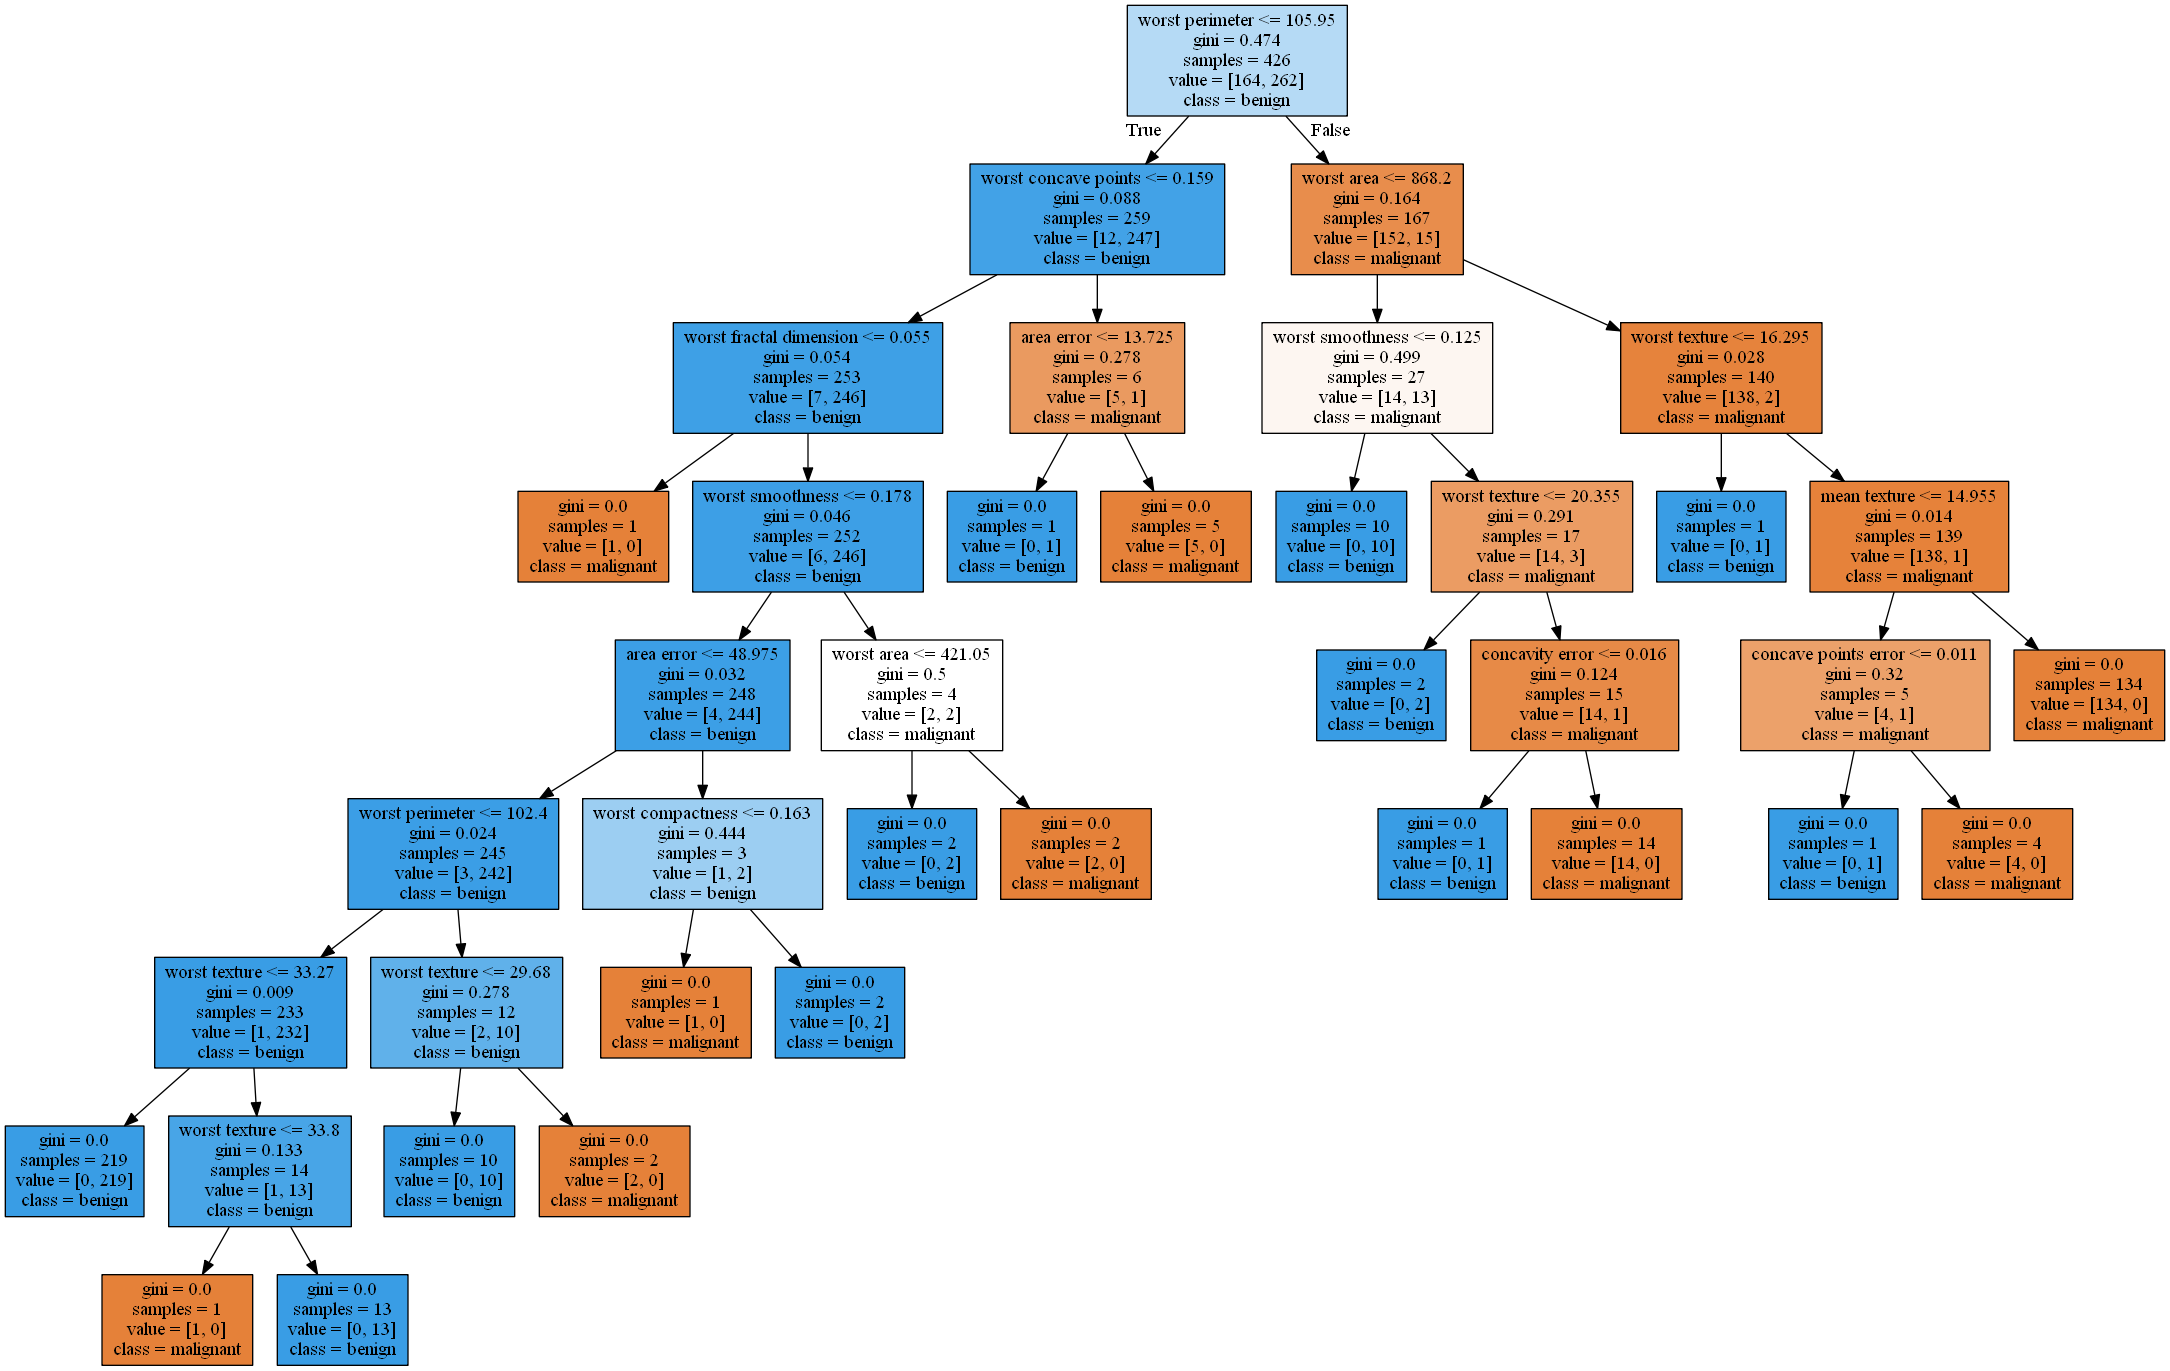

In [6]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image  
dot_data = export_graphviz(clf, out_file = None, 
                           feature_names = breast_cancer.feature_names,  
                           class_names = breast_cancer.target_names,  
                           filled = True, rounded = False)  
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())
# import graphviz 也可以用此 graphviz 生成可視化決策樹
# graph_tree = graphviz.Source(dot_data)  
# graph_tree 

In [7]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 5, class_weight = 'balanced', random_state = 4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Acuuracy: ", metrics.accuracy_score(y_test, y_pred))

Acuuracy:  0.909090909091


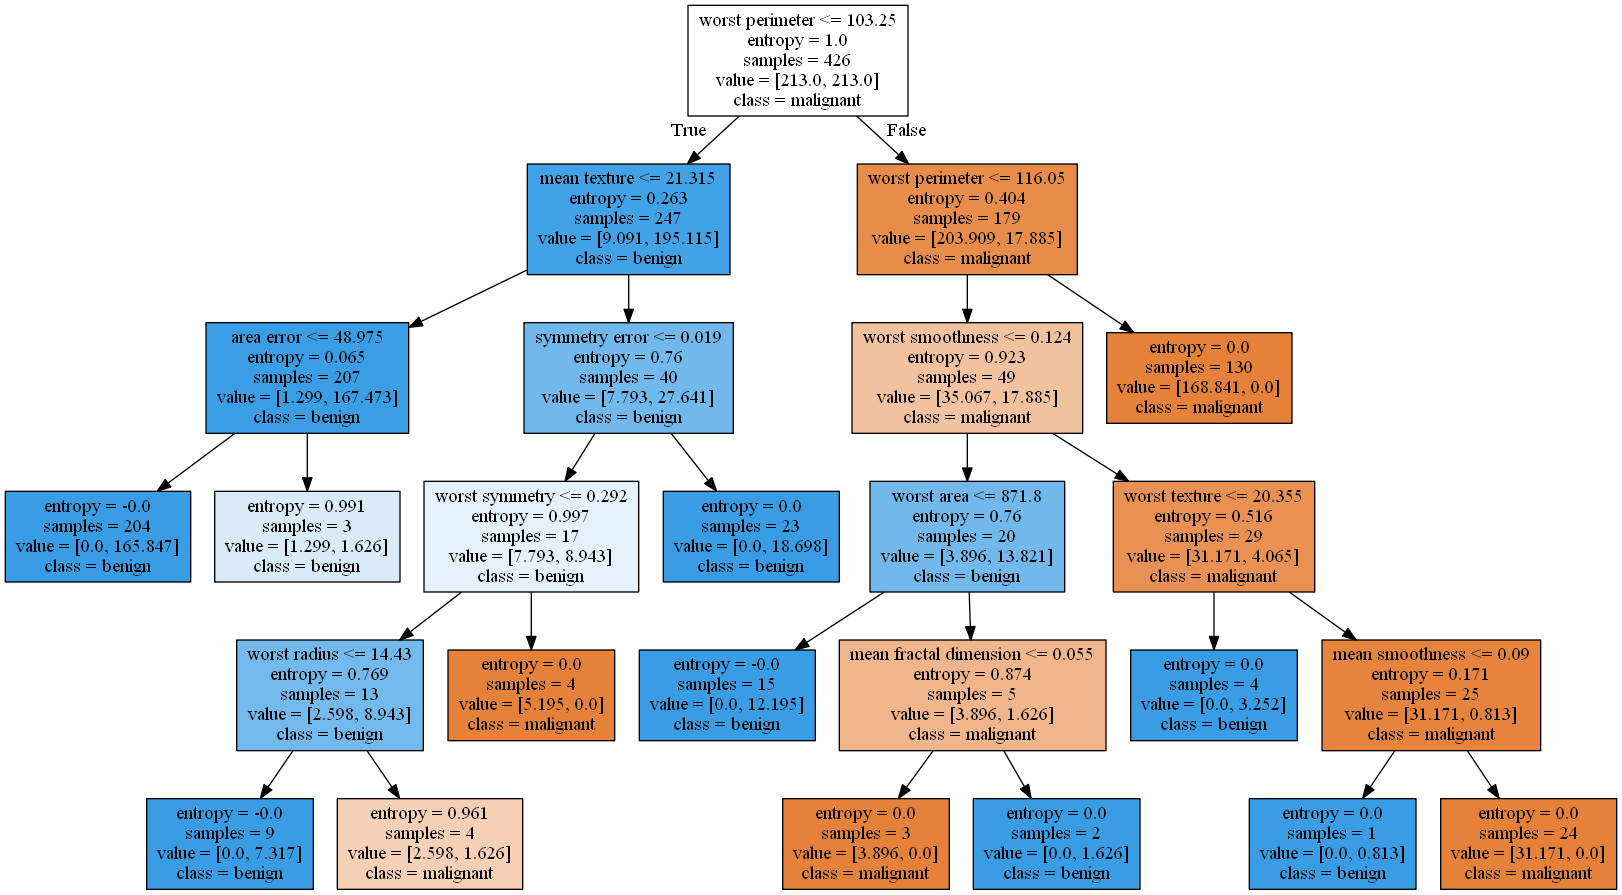

In [8]:
dot_data = export_graphviz(clf, out_file = None, 
                           feature_names = breast_cancer.feature_names,  
                           class_names = breast_cancer.target_names,  
                           filled = True, rounded = False)  
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())